<a href="https://colab.research.google.com/github/aliciama16/sf-library-data-exploration/blob/main/ANSWERS_SF_Library_Exercise_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Large-Scale Library Data with Python!**

This notebook is a guided Python exploration using a publicly available dataset from the San Francisco Public Library. The data comes from the library's Integrated Library System (ILS) and shows circulation activity by active patrons.

The dataset contains about 420,000 anonymized patron records with information such as patron type, year of registration (from 2003-2016) and general circulation activity. For this exercise, we are using the [2017 dataset](https://www.kaggle.com/datasets/datasf/sf-library-usage-data/data), but an updated 2024 dataset is available [here](https://data.sfgov.org/Culture-and-Recreation/Library-Usage/qzz6-2jup/about_data).

This kind of dataset is typical in library, archive, and museum work. It often shows up as a CSV or spreadsheet, and while it can be opened in Excel, it’s usually too large to make a meaningful analysis of it.

Here, Python is used as a way to get oriented within a large dataset. The goal of this guide isn’t to master Python or analyze every possible angle of this datasheet, but to show how a few basic Python libraries and codes can help summarize patterns, surface trends, and make large amounts of data easier to think through.




# 1 - Setup and Load Data
Before we can begin, you'll need to download the dataset to use:

1.   **[Download the ZIP file here](SF_Library_Usage_2016_v1.csv.zip)**
2.   **UNZIP** the file (its uncompressed size is 34.4 MB)
3. Upload the CSV to your Google Drive



# 2 - Loading and Inspecting the Data
Next, you'll need to connect your Google Drive so this notebook can access the CSV you just uploaded.

1. Click the "run" button (the arrow) on the code cell below

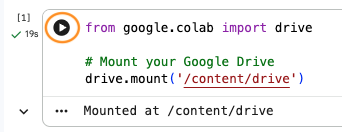

2. Click "Connect to Google Drive"
3. Click "Continue" to sign in
4. Click "Continue" to grant all permissions

In [1]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3 - Find the File Path to the CSV


1. Click on the folder icon on the left side of your screen.
2. Click on "drive" to expand your drive
3. Click on **"MyDrive"** to view all your folders <br>
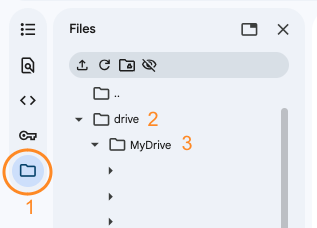 <br>


4. Scroll until you find the Library Usage CSV file
5. **RIGHT CLICK on the file and "copy path"**
6. Paste that link below where indicated

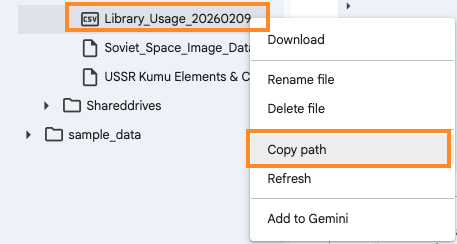

# 4 - Importing the Pandas Library & Taking a First Look


When first looking at a dataset, **the goal is just to get a feel for what’s here: what columns exist, what kinds of values they hold, and see if anything looks inconsistent or incomplete** Looking at the first few rows can help establish those basics and gives us a sense of how each record is structured.

In this next step we import the Pandas library to view the CSV as a dataframe, tell Python the path to the CSV file, and ask it to read the file and use the code df.head() as a way to see the first few rows.

In [2]:
path = "/content/drive/MyDrive/Library_Usage.csv" #PASTE YOUR LINK HERE! (It may be the same as mine)

# --------------------------------------------------------------------------
# This step imports the Pandas library
# We're also nicknaming it pd so we don't have to type pandas each time!
# --------------------------------------------------------------------------
import pandas as pd

# --------------------------------------------------------------------------
# This step assigns "df" (dataframe) as the CSV so we don't need to type the filepath each time
# df.head() is telling Python we want to look at the first few rows of our dataframe
# --------------------------------------------------------------------------
df = pd.read_csv(path)
df.head()

# --------------------------------------------------------------------------
# Press the "Run" arrow button and see what happens!
# --------------------------------------------------------------------------

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012.0,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015.0,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015.0,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016.0,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016.0,z,email,True,2003,False,NaN


# 5 - Getting a Sense of Scale

## **df.info()**

Before doing more analysis, it’s important to understand the basic structure of the dataset. Here are a few questions we always want to ask first:

* What columns are included?

* How many rows are there?

* What kinds of data are represented (text, numbers, dates)?

This step is just about developing good data habits. Many analytical errors come from skipping this stage. We can answer a few of these questions using the code query df.info()

## **df["COLUMN NAME HERE"].value_counts()**

Counting categories to understand scale is another simple way to see how often values appear in a column. For this dataset that has nearly 500,000 records, it helps us quickly answer questions like:

* How many different patron types exist?

* What years were patrons registered?

* Which values dominate the dataset?

All we need to do is tell Python what column we want to examine and say we want the value counts.

Pandas code references:

*  df.info(): https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
* value_counts(): https://pandas.pydata.org/docs/reference/api/pandas.api.typing.DataFrameGroupBy.value_counts.html#pandas.api.typing.DataFrameGroupBy.value_counts


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      355544 non-null  object 
 8   Circulation Active Year       355544 non-null  float64
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [4]:
df["Patron Type Definition"].value_counts()

,count
Patron Type Definition,
ADULT,272251
JUVENILE,59208
SENIOR,41619
YOUNG ADULT,28816
WELCOME,14931
TEACHER CARD,1782
DIGITAL ACCESS CARD,1744
SPECIAL,977
STAFF,862


In [5]:
df["Year Patron Registered"].value_counts()

,count
Year Patron Registered,
2003,69257
2015,53951
2014,51902
2013,48251
2012,37395
2011,26531
2016,26288
2010,24321
2009,22307


In [ ]:
# --------------------------------------------------------------------------
# Your choice! Pick a column, but make sure you put in the EXACT name and within quotations. Check the table we first generated using df.head()
# --------------------------------------------------------------------------

df["CHOOSE_A_COLUMN_NAME"].value_counts()

# 6 - Charts and Visualizations
Tables are useful, but visualizations can help us see patterns more quickly, especially when dealing with many categories or long time spans.

### **MatPlotLib Library**
Here, we will import [MatPlotLib](https://matplotlib.org/stable/users/index) to create visualizations.

References:
* https://matplotlib.org/
* https://matplotlib.org/cheatsheets/
* https://matplotlib.org/stable/users/explain/colors/index.html
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html

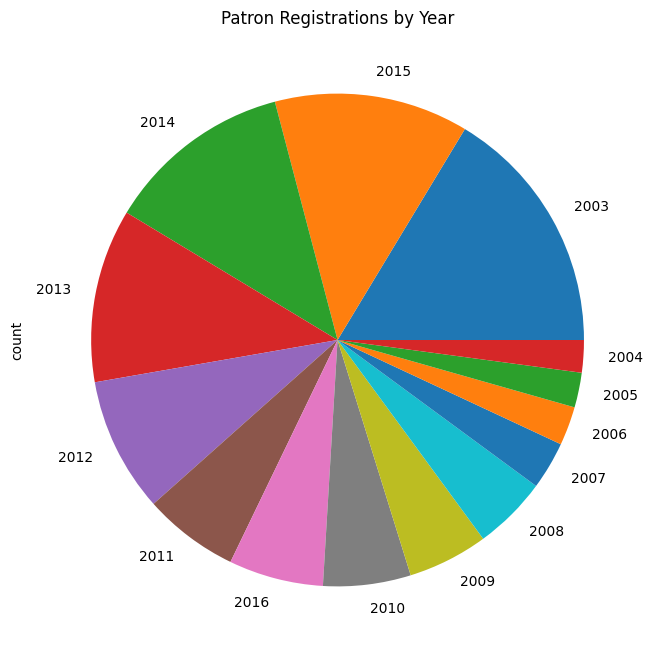

In [7]:
# --------------------------------------------------------------------------
# This step imports the MatPlotLib library
# We're also nicknaming it plt so we don't have to type MatPlotLib each time!
# --------------------------------------------------------------------------
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------
# This is the size of the chart. Play with the numbers and see what changes!
# --------------------------------------------------------------------------
plt.figure(figsize=(8,8))


# --------------------------------------------------------------------------
# This is what we are plotting in our pie chart - we're looking at the years patrons registered and how many
# --------------------------------------------------------------------------
df["Year Patron Registered"].value_counts().plot(
    kind="pie",
)

# --------------------------------------------------------------------------
# This controls what text shows up on the chart. Change up the text + see what happens
# --------------------------------------------------------------------------
plt.title("Patron Registrations by Year")
plt.show()

### Other chart options
See how you want to change your graph... perhaps this would be better as a bar chart. Where do you think you could change that?

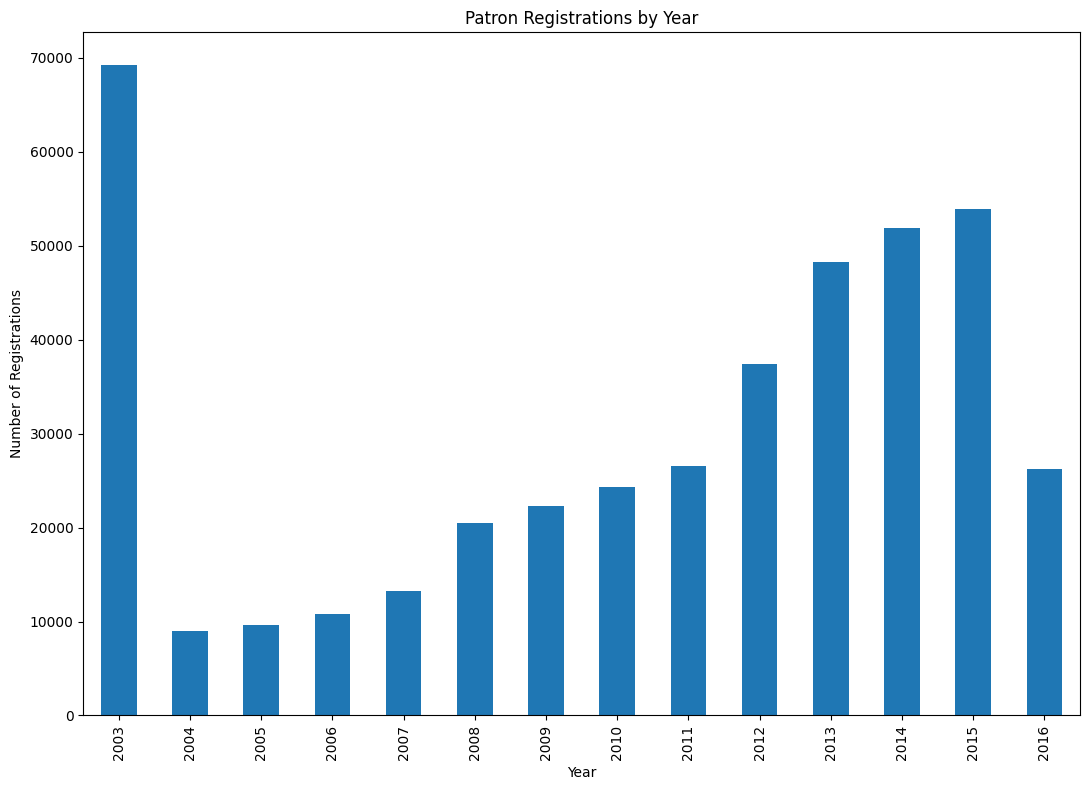

In [9]:
df["Year Patron Registered"].value_counts().sort_index().plot(
    kind="bar", #perhaps here
    figsize=(11,8),
)

plt.title("Patron Registrations by Year")
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.tight_layout()
plt.show()


## Play with color + apperance
Let's move to a new exploration, but let's also play with the colors! Here are a few choices from the MatPlotLib guidance 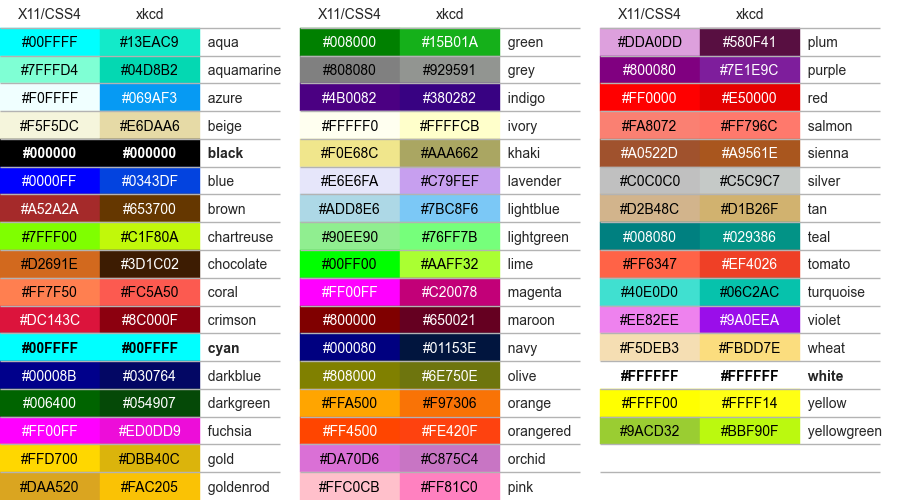

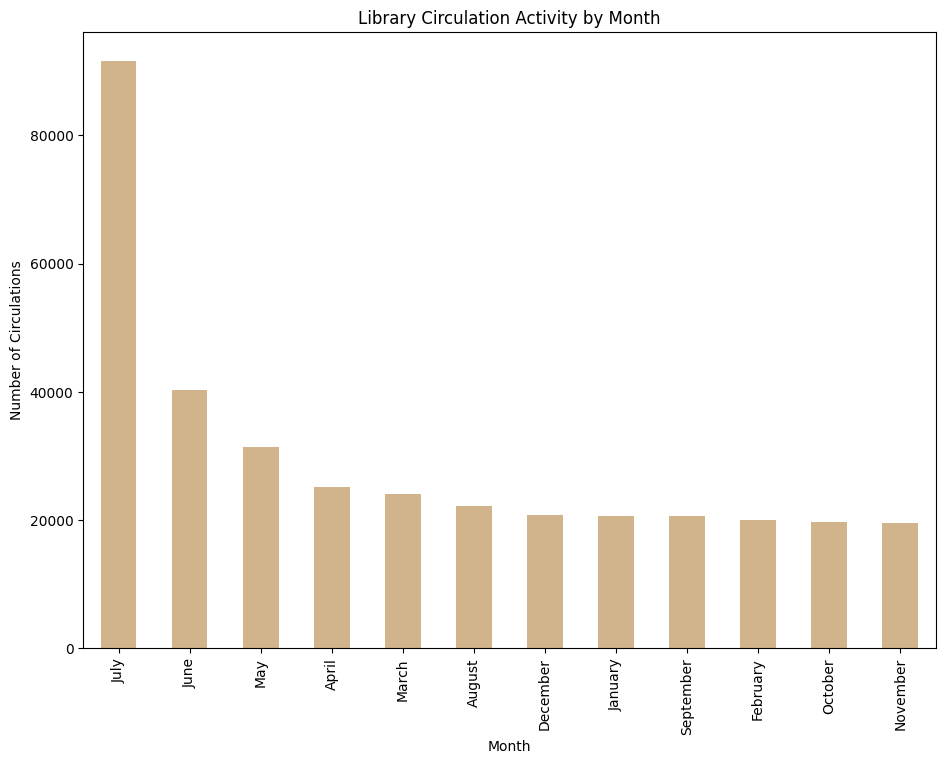

In [10]:
df["Circulation Active Month"].value_counts().plot(
    kind="bar",
    figsize=(11,8),
    color=["tan"]
)

plt.title("Library Circulation Activity by Month")
plt.ylabel("Number of Circulations")
plt.xlabel("Month")
plt.show()

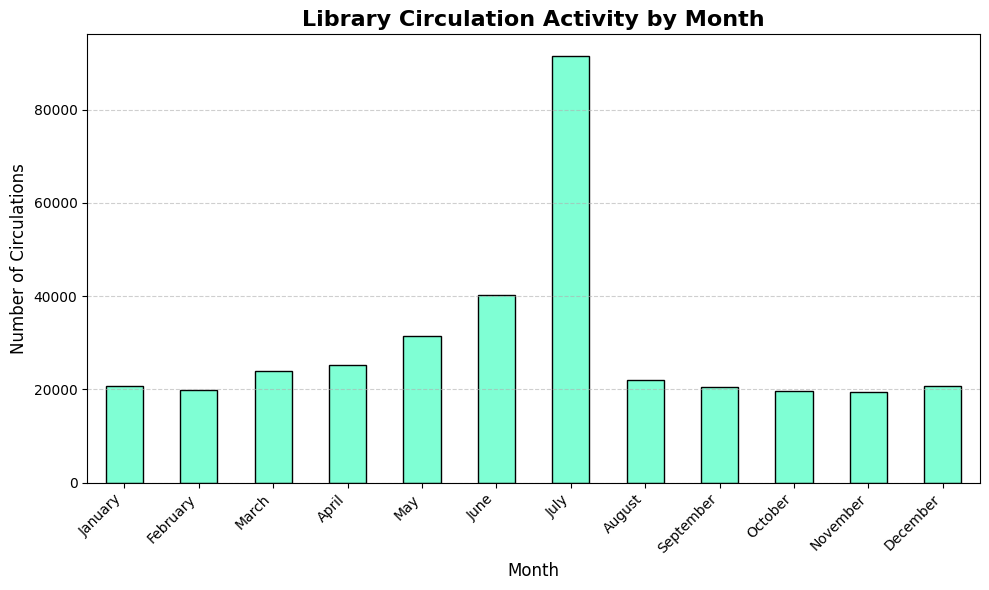

In [11]:
# --------------------------------------------------------------------------
# Wouldn't the chart be better if we arranged the months chronologically?
# --------------------------------------------------------------------------
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_counts = df["Circulation Active Month"].value_counts().reindex(month_order)

month_counts.plot(
    kind="bar",
    color="aquamarine",
    edgecolor="black",
    figsize=(10,6)
)

# --------------------------------------------------------------------------
# Play even more with how the chart looks!
# --------------------------------------------------------------------------
plt.title("Library Circulation Activity by Month", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Circulations", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# 7 - Missing Data

### **.isna()**

Before analyses, it’s important to ask: **what isn't here?**
Most datasets have gaps, and those gaps can matter.

Real-world datasets almost always have missing values (not because something went wrong) but because certain information just wasn’t captured, wasn’t required, or didn’t apply. That can quietly shape what your analysis shows. Let's check if we missed anything.

We will use .isna() to detect missing values, but will also pair that with.sum() to quickly see how many missing values exist in each column.

References:
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

In [12]:
df.isna().sum()

,0
Patron Type Code,0
Patron Type Definition,0
Total Checkouts,0
Total Renewals,0
Age Range,215
Home Library Code,40
Home Library Definition,0
Circulation Active Month,67904
Circulation Active Year,67904
Notice Preference Code,0



**.fillna()**

There are a lot of missing values in Circulation Active Month, which means our earlier chart isn’t fully accurate. By default, Python ignores missing values, so they vanish from the visualization. Replacing them with a label like "Not Captured" allows us to make that absence visible and interpret the data more honestly.

**It's a good reminder that Python cannot replace human judgement. It's just helping us see patterns we couldn't reasonably see while scrolling through ourselves**

We will use .fillna() to tell Python that for missing values in the column "Circulation Active Month" we want to re-assign them as "Not Captured" instead. This is a moment to be very thankful for Python because doing this for 67,000+ rows in Excel would break your computer.

**This also just changes the dataset for this Google CoLab Python session ONLY. It does not change or overwrite the original CSV file unless we write a code to do that.**

References:
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [13]:
# --------------------------------------------------------------------------
# Replacing missing values in that column with "Not Captured" instead
# --------------------------------------------------------------------------
df['Circulation Active Month'] = df['Circulation Active Month'].fillna('Not Captured')


# --------------------------------------------------------------------------
# Recheck missing values now!
# --------------------------------------------------------------------------
df.isna().sum()

,0
Patron Type Code,0
Patron Type Definition,0
Total Checkouts,0
Total Renewals,0
Age Range,215
Home Library Code,40
Home Library Definition,0
Circulation Active Month,0
Circulation Active Year,67904
Notice Preference Code,0


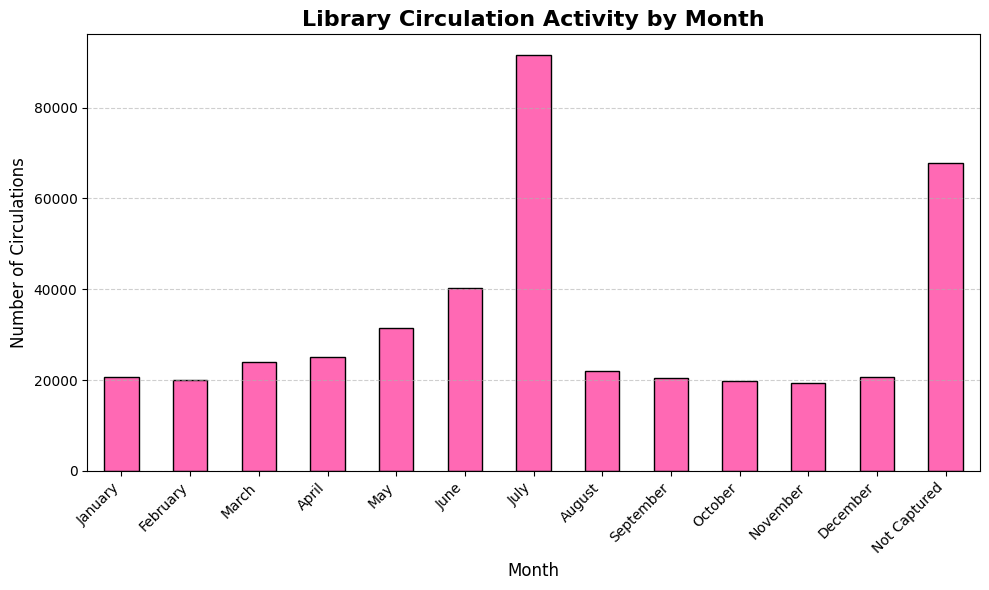

In [14]:
# --------------------------------------------------------------------------
# Let's run our chart again now!
# --------------------------------------------------------------------------

month_order = ["January","February","March","April","May","June","July","August","September","October","November","December", "Not Captured"]
month_counts = df["Circulation Active Month"].value_counts().reindex(month_order)

month_counts.plot(
    kind="bar",
    color="hotpink",
    edgecolor="black",
    figsize=(10,6)
)

plt.title("Library Circulation Activity by Month", fontsize=16, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Circulations", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()